# Pre-Processing for early fusion

In [1]:
import os
import torch
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Your original directories
rgb_dir = r"/home/user/Shivam/dsr_project/dataset/Co-registered/Simulated dataset/images/RGB"
ir_dir = r"/home/user/Shivam/dsr_project/dataset/Co-registered/Simulated dataset/images/norm_ir_8bit"
save_dir = r"/home/user/Shivam/dsr_project/dataset/Co-registered/Simulated dataset/images/fused_4ch"
os.makedirs(save_dir, exist_ok=True)

# Transformation: Resize + ToTensor
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# Step 1: List and match files based on filename
rgb_files = sorted([f for f in os.listdir(rgb_dir) if f.endswith(('.jpg', '.png'))])
ir_files = sorted([f for f in os.listdir(ir_dir) if f.endswith(('.jpg', '.png'))])

# Make a set for faster lookup
ir_file_set = set(ir_files)

for idx, rgb_file in enumerate(rgb_files):
    # Assume IR file has the same base name (maybe different extension handling if needed)
    if rgb_file in ir_file_set:
        rgb_path = os.path.join(rgb_dir, rgb_file)
        ir_path = os.path.join(ir_dir, rgb_file)

        rgb_img = Image.open(rgb_path).convert("RGB")
        ir_img = Image.open(ir_path).convert("L")

        rgb_tensor = transform(rgb_img)  # [3, 256, 256]
        ir_tensor = transform(ir_img)    # [1, 256, 256]

        # Ensure sizes match
        assert rgb_tensor.shape[1:] == ir_tensor.shape[1:], f"Size mismatch at {rgb_file}"

        # Concatenate
        fused_tensor = torch.cat((rgb_tensor, ir_tensor), dim=0)

        # Save
        fused_save_path = os.path.join(save_dir, f"fused_{idx:04d}.pt")
        torch.save(fused_tensor, fused_save_path)
    else:
        print(f"Warning: No matching IR image for {rgb_file}")

print("Fusion and saving done ✅")

Fusion and saving done ✅


Fused image shape: torch.Size([4, 256, 256])


/tmp/ipykernel_45283/579484850.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  fused = torch.load(sample_path)  # Shape: [4, 256, 256]


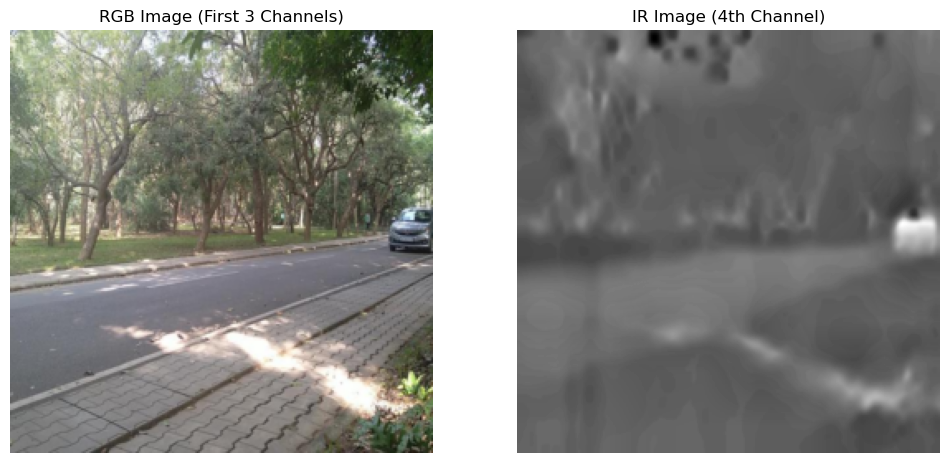

In [2]:
# Load a sample fused tensor
sample_path = r"/home/user/Shivam/dsr_project/dataset/Co-registered/Simulated dataset/images/fused_4ch/fused_0003.pt"  # Change the index as needed
fused = torch.load(sample_path)  # Shape: [4, 256, 256]

print(f"Fused image shape: {fused.shape}")  # Should be [4, 256, 256]

# Display RGB part (first 3 channels)
rgb_image = fused[:3, :, :].permute(1, 2, 0)  # [H, W, 3] for plt.imshow

# Display IR part (4th channel)
ir_image = fused[3, :, :]  # [H, W] for grayscale

# Plot
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(rgb_image)
plt.title('RGB Image (First 3 Channels)')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(ir_image, cmap='gray')
plt.title('IR Image (4th Channel)')
plt.axis('off')

plt.show()


In [3]:
import os
import torch
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Your original directories
rgb_dir = r"/home/user/Shivam/dsr_project/dataset/Co-registered/us mil Paper dataset/images/RGB"
ir_dir = r"/home/user/Shivam/dsr_project/dataset/Co-registered/us mil Paper dataset/images/IR_norm8bit"
save_dir = r"/home/user/Shivam/dsr_project/dataset/Co-registered/us mil Paper dataset/images/fused_4ch"
os.makedirs(save_dir, exist_ok=True)

# Transformation: Resize + ToTensor
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# Step 1: List and match files based on filename
rgb_files = sorted([f for f in os.listdir(rgb_dir) if f.endswith(('.jpg', '.png'))])
ir_files = sorted([f for f in os.listdir(ir_dir) if f.endswith(('.jpg', '.png'))])

# Make a set for faster lookup
ir_file_set = set(ir_files)

for idx, rgb_file in enumerate(rgb_files):
    # Assume IR file has the same base name (maybe different extension handling if needed)
    if rgb_file in ir_file_set:
        rgb_path = os.path.join(rgb_dir, rgb_file)
        ir_path = os.path.join(ir_dir, rgb_file)

        rgb_img = Image.open(rgb_path).convert("RGB")
        ir_img = Image.open(ir_path).convert("L")

        rgb_tensor = transform(rgb_img)  # [3, 256, 256]
        ir_tensor = transform(ir_img)    # [1, 256, 256]

        # Ensure sizes match
        assert rgb_tensor.shape[1:] == ir_tensor.shape[1:], f"Size mismatch at {rgb_file}"

        # Concatenate
        fused_tensor = torch.cat((rgb_tensor, ir_tensor), dim=0)

        # Save
        fused_save_path = os.path.join(save_dir, f"fused_{idx:04d}.pt")
        torch.save(fused_tensor, fused_save_path)
    else:
        print(f"Warning: No matching IR image for {rgb_file}")

print("Fusion and saving done ✅")

Fusion and saving done ✅


Fused image shape: torch.Size([4, 256, 256])


/tmp/ipykernel_45283/1504452473.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  fused = torch.load(sample_path)  # Shape: [4, 256, 256]


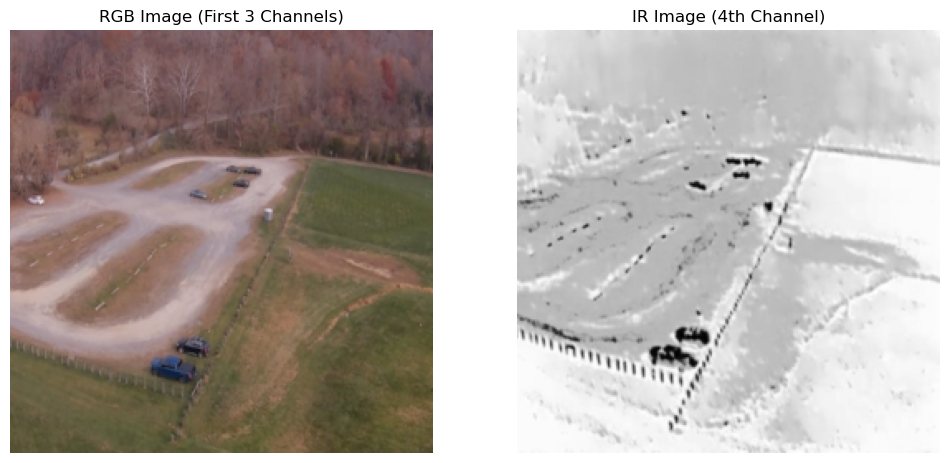

In [4]:
# Load a sample fused tensor
sample_path = r"/home/user/Shivam/dsr_project/dataset/Co-registered/us mil Paper dataset/images/fused_4ch/fused_0000.pt"  # Change the index as needed
fused = torch.load(sample_path)  # Shape: [4, 256, 256]

print(f"Fused image shape: {fused.shape}")  # Should be [4, 256, 256]

# Display RGB part (first 3 channels)
rgb_image = fused[:3, :, :].permute(1, 2, 0)  # [H, W, 3] for plt.imshow

# Display IR part (4th channel)
ir_image = fused[3, :, :]  # [H, W] for grayscale

# Plot
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(rgb_image)
plt.title('RGB Image (First 3 Channels)')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(ir_image, cmap='gray')
plt.title('IR Image (4th Channel)')
plt.axis('off')

plt.show()


In [1]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# ---------------------- Imports ----------------------

In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
from torchsummary import summary
import onnx
import onnxruntime as ort
from sklearn.metrics import precision_score, recall_score, f1_score

# ---------------------- Dataset Class ----------------------

In [3]:
class SaliencyDataset4Channel_PT(Dataset):
    def __init__(self, image_paths, mask_paths, transform_image=None, transform_mask=None):
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.transform_image = transform_image
        self.transform_mask = transform_mask

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Load 4-channel tensor image from .pt file
        image = torch.load(self.image_paths[idx])  # Loaded as tensor directly
        if image.dim() == 3 and image.shape[0] != 4:
            raise ValueError(f"Expected 4-channel image, but got shape {image.shape}")

        # Load mask (still normal image file)
        mask = Image.open(self.mask_paths[idx]).convert("L")

        if self.transform_image:
            image = self.transform_image(image)
        if self.transform_mask:
            mask = self.transform_mask(mask)

        return image, mask

# ---------------------- Paths & Setup ----------------------

In [5]:
# Image and mask directories
image_dirs = [    
    r"/home/user/Shivam/dsr_project/dataset/Co-registered/Simulated dataset/images/fused_4ch",
    r"/home/user/Shivam/dsr_project/dataset/Co-registered/us mil Paper dataset/images/fused_4ch"
]

mask_dirs = [
    r"/home/user/Shivam/dsr_project/dataset/Co-registered/Simulated dataset/saliency_masks",
    r"/home/user/Shivam/dsr_project/dataset/Co-registered/us mil Paper dataset/Saliency_map/RGB"
]

# Collect paths
image_files = []
mask_files = []

for img_dir, msk_dir in zip(image_dirs, mask_dirs):
    imgs = sorted([os.path.join(img_dir, f) for f in os.listdir(img_dir) if f.endswith(".pt")])
    msks = sorted([os.path.join(msk_dir, f) for f in os.listdir(msk_dir) if f.endswith(".png") or f.endswith(".jpg")])

    assert len(imgs) == len(msks), f"Mismatch between images and masks in {img_dir}"

    image_files.extend(imgs)
    mask_files.extend(msks)

# Train-test split
train_imgs, test_imgs, train_masks, test_masks = train_test_split(image_files, mask_files, test_size=0.2, random_state=42)

# Transforms
transform_image = transforms.Compose([
    transforms.Resize((256, 256)),
    # images are already tensors
])

transform_mask = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# ---------------- Datasets and DataLoaders ----------------

In [6]:
# Datasets and loaders
train_dataset = SaliencyDataset4Channel_PT(train_imgs, train_masks, transform_image=transform_image, transform_mask=transform_mask)
test_dataset = SaliencyDataset4Channel_PT(test_imgs, test_masks, transform_image=transform_image, transform_mask=transform_mask)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# ---------------------- Verify dataset ----------------------

/tmp/ipykernel_51027/388904899.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  image = torch.load(self.image_paths[idx])  # Loaded as tensor directly


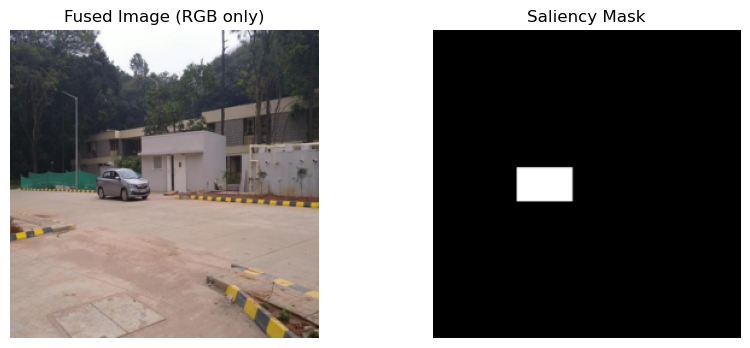

In [8]:
# ---------------------- Visual Check ----------------------
def show_fused_image_with_mask(image_tensor, mask_tensor):
    rgb_tensor = image_tensor[:3]  # Take RGB channels for visualization
    rgb_np = rgb_tensor.permute(1, 2, 0).cpu().numpy()
    mask_np = mask_tensor.squeeze().cpu().numpy()

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(rgb_np)
    plt.title("Fused Image (RGB only)")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(mask_np, cmap="gray")
    plt.title("Saliency Mask")
    plt.axis("off")
    plt.show()

# Display a sample
sample_img, sample_mask = next(iter(train_loader))
show_fused_image_with_mask(sample_img[11], sample_mask[11])


# ---------------------- Model Definition --------------------

In [2]:
class Saliency_Fused(nn.Module):
    def __init__(self):
        super(Saliency_Fused, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(4, 64, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d(2)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2), nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2), nn.ReLU(),
            nn.ConvTranspose2d(64, 1, kernel_size=2, stride=2), nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# ---------------------- Training Setup ----------------------

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Saliency_Fused().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ---------------------- Training Loop ----------------------

In [9]:
num_epochs = 100

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for images, masks in train_loader:
        images, masks = images.to(device), masks.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(train_loader):.4f}")

/tmp/ipykernel_54275/388904899.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  image = torch.load(self.image_paths[idx])  # Loaded as tensor directly


Epoch [1/100], Loss: 0.2041
Epoch [2/100], Loss: 0.1548
Epoch [3/100], Loss: 0.1476
Epoch [4/100], Loss: 0.1382
Epoch [5/100], Loss: 0.1294
Epoch [6/100], Loss: 0.1255
Epoch [7/100], Loss: 0.1207
Epoch [8/100], Loss: 0.1166
Epoch [9/100], Loss: 0.1114
Epoch [10/100], Loss: 0.1082
Epoch [11/100], Loss: 0.1059
Epoch [12/100], Loss: 0.1026
Epoch [13/100], Loss: 0.0999
Epoch [14/100], Loss: 0.0987
Epoch [15/100], Loss: 0.0971
Epoch [16/100], Loss: 0.0944
Epoch [17/100], Loss: 0.0924
Epoch [18/100], Loss: 0.0895
Epoch [19/100], Loss: 0.0898
Epoch [20/100], Loss: 0.0864
Epoch [21/100], Loss: 0.0849
Epoch [22/100], Loss: 0.0835
Epoch [23/100], Loss: 0.0808
Epoch [24/100], Loss: 0.0805
Epoch [25/100], Loss: 0.0782
Epoch [26/100], Loss: 0.0769
Epoch [27/100], Loss: 0.0762
Epoch [28/100], Loss: 0.0789
Epoch [29/100], Loss: 0.0745
Epoch [30/100], Loss: 0.0733
Epoch [31/100], Loss: 0.0742
Epoch [32/100], Loss: 0.0718
Epoch [33/100], Loss: 0.0709
Epoch [34/100], Loss: 0.0702
Epoch [35/100], Loss: 0

/tmp/ipykernel_51027/388904899.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  image = torch.load(self.image_paths[idx])  # Loaded as tensor directly


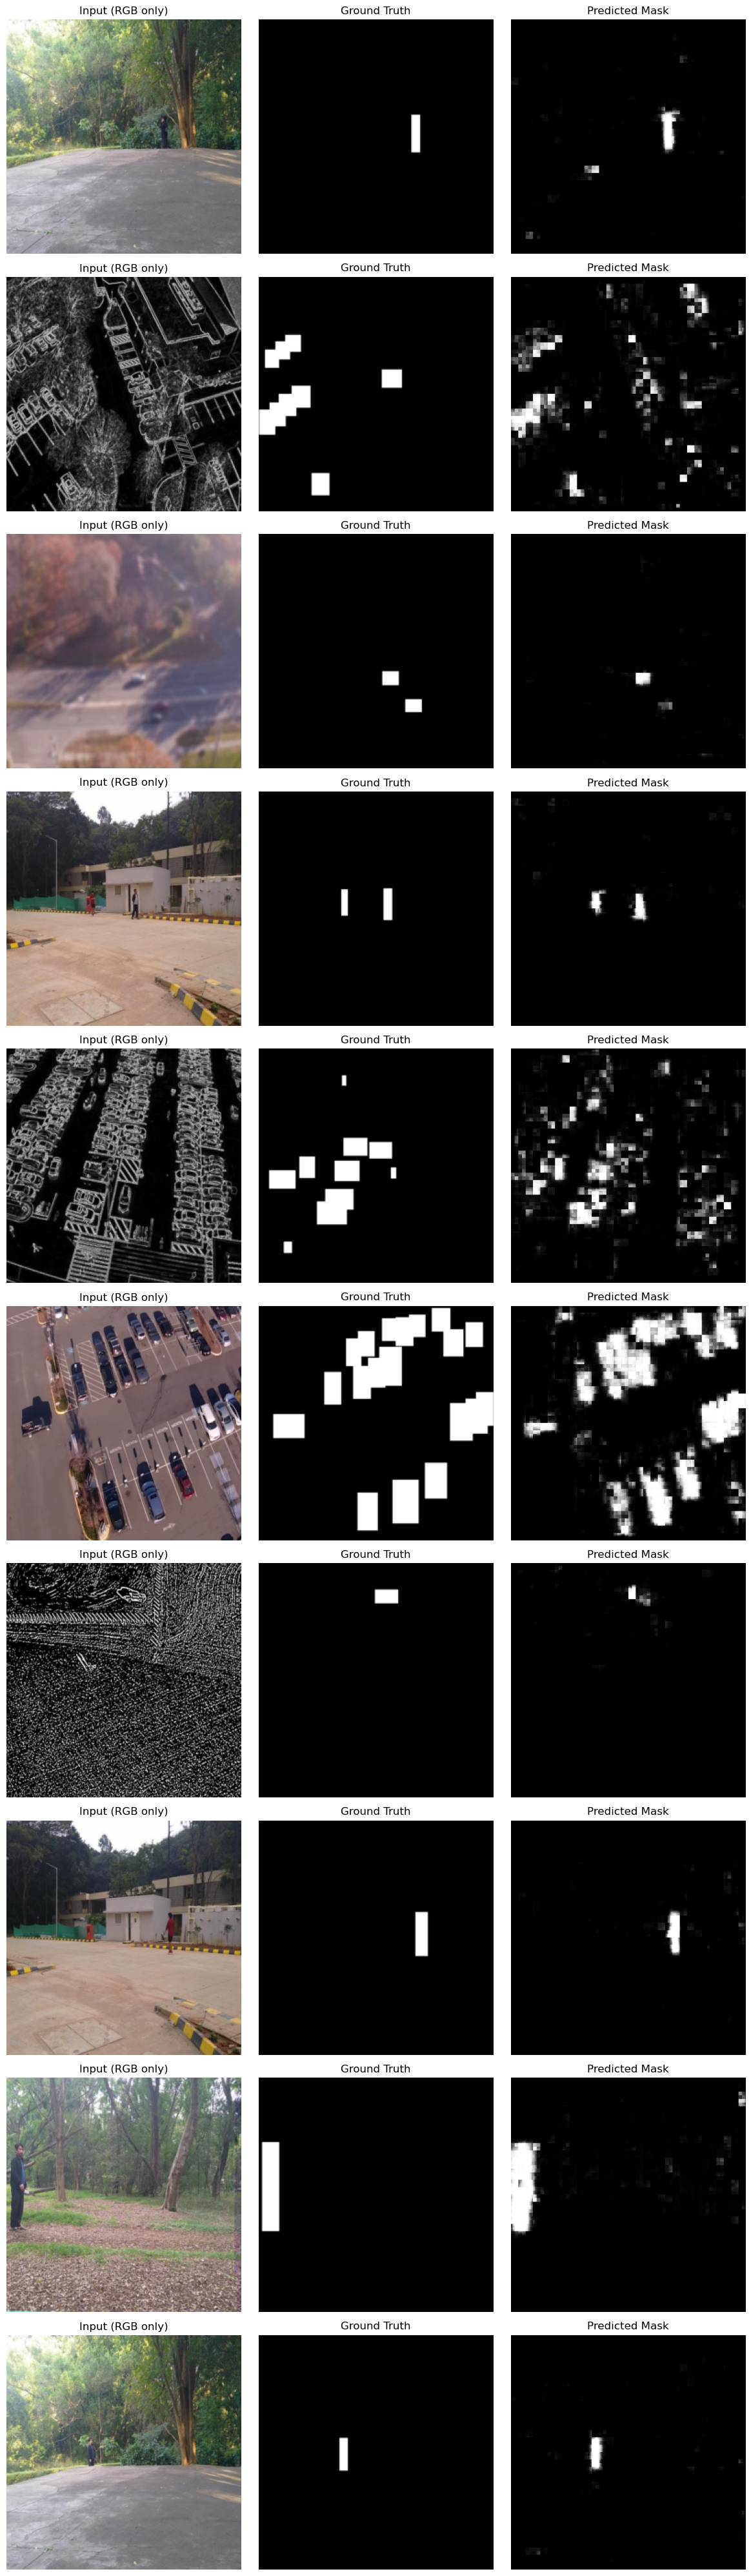

In [12]:
model.eval()
with torch.no_grad():
    random_indices = random.sample(range(len(test_dataset)), 10)
    fig, axes = plt.subplots(10, 3, figsize=(12, 40))

    for idx, random_idx in enumerate(random_indices):
        image, mask = test_dataset[random_idx]  # image: (4, H, W)
        image = image.unsqueeze(0).to(device)
        mask = mask.unsqueeze(0).to(device)

        output = model(image)

        rgb_np = image[0][:3].permute(1, 2, 0).cpu().numpy()
        mask_np = mask[0][0].cpu().numpy()
        output_np = output[0][0].cpu().numpy()

        axes[idx, 0].imshow(rgb_np)
        axes[idx, 0].set_title("Input (RGB only)")
        axes[idx, 0].axis("off")

        axes[idx, 1].imshow(mask_np, cmap='gray')
        axes[idx, 1].set_title("Ground Truth")
        axes[idx, 1].axis("off")

        axes[idx, 2].imshow(output_np, cmap='gray')
        axes[idx, 2].set_title("Predicted Mask")
        axes[idx, 2].axis("off")

    plt.tight_layout()
    plt.show()

# ---------------------- Saving the model -------------------

In [10]:
torch.save(model.state_dict(), "/home/user/Shivam/dsr_project/Project_files/models/saliency/saliency_model_fused.pth")
print("Model saved as saliency_model_fused.pth")

Model saved as saliency_model_fused.pth


In [11]:
torch.save(model.state_dict(), "/home/user/Shivam/dsr_project/Project_files/models/saliency/saliency_model_early_fusion.pth")
print("Model saved as saliency_model_early_fusion.pth")

Model saved as saliency_model_early_fusion.pth


In [12]:
# Instantiate model and load weights
model = Saliency_Fused().to(device)
model.load_state_dict(torch.load("/home/user/Shivam/dsr_project/Project_files/models/saliency/saliency_model_early_fusion.pth"))
model.eval()

/tmp/ipykernel_54275/2989943570.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/home/user/Shivam/dsr_project/Project_files/models/sali

Saliency_Fused(
  (encoder): Sequential(
    (0): Conv2d(4, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(256, 128, kernel_size=(2, 2), stride=(2, 2))
    (1): ReLU()
    (2): ConvTranspose2d(128, 64, kernel_size=(2, 2), stride=(2, 2))
    (3): ReLU()
    (4): ConvTranspose2d(64, 1, kernel_size=(2, 2), stride=(2, 2))
    (5): Sigmoid()
  )
)

In [1]:
import os


In [13]:
# ---------------------- Model Summary ---------------------
summary(model, input_size=(4, 256, 256))   

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]           2,368
              ReLU-2         [-1, 64, 256, 256]               0
         MaxPool2d-3         [-1, 64, 128, 128]               0
            Conv2d-4        [-1, 128, 128, 128]          73,856
              ReLU-5        [-1, 128, 128, 128]               0
         MaxPool2d-6          [-1, 128, 64, 64]               0
            Conv2d-7          [-1, 256, 64, 64]         295,168
              ReLU-8          [-1, 256, 64, 64]               0
         MaxPool2d-9          [-1, 256, 32, 32]               0
  ConvTranspose2d-10          [-1, 128, 64, 64]         131,200
             ReLU-11          [-1, 128, 64, 64]               0
  ConvTranspose2d-12         [-1, 64, 128, 128]          32,832
             ReLU-13         [-1, 64, 128, 128]               0
  ConvTranspose2d-14          [-1, 1, 2

# ------------------ Export Model to ONNX ------------------

In [16]:
dummy_input = torch.randn(1, 4, 256, 256).to(device)  # 4-channel input

onnx_export_path = "/home/user/Shivam/dsr_project/Project_files/models/saliency/saliency_model_fused.onnx"

torch.onnx.export(
    model, dummy_input, onnx_export_path,
    input_names=["input"],
    output_names=["output"],
    opset_version=11,
    do_constant_folding=True
)

print(f"Model exported successfully to {onnx_export_path}")

Model exported successfully to /home/user/Shivam/dsr_project/Project_files/models/saliency/saliency_model_fused.onnx


In [14]:
dummy_input = torch.randn(1, 4, 256, 256).to(device)  # 4-channel input

onnx_export_path = "/home/user/Shivam/dsr_project/Project_files/models/saliency/saliency_model_early_fusion.onnx"

torch.onnx.export(
    model, dummy_input, onnx_export_path,
    input_names=["input"],
    output_names=["output"],
    opset_version=11,
    do_constant_folding=True
)

print(f"Model exported successfully to {onnx_export_path}")

Model exported successfully to /home/user/Shivam/dsr_project/Project_files/models/saliency/saliency_model_early_fusion.onnx


# ------------------- Verify ONNX Model -------------------

In [15]:
onnx_model = onnx.load(onnx_export_path)
onnx.checker.check_model(onnx_model)
print("ONNX model is valid!")

ort_session = ort.InferenceSession(onnx_export_path)

dummy_input_numpy = np.random.randn(1, 4, 256, 256).astype(np.float32)

ort_inputs = {ort_session.get_inputs()[0].name: dummy_input_numpy}
ort_outs = ort_session.run(None, ort_inputs)

print(f"ONNX Inference output shape: {ort_outs[0].shape}")

ONNX model is valid!
ONNX Inference output shape: (1, 1, 256, 256)


# ------------ Metrics and application example ------------

In [16]:
def compute_iou(pred_mask, true_mask, threshold=0.5):
    pred_bin = (pred_mask > threshold).astype(np.uint8)
    true_bin = (true_mask > 0.5).astype(np.uint8)

    intersection = np.logical_and(pred_bin, true_bin).sum()
    union = np.logical_or(pred_bin, true_bin).sum()

    if union == 0:  # Avoid division by zero
        return float(intersection == 0)
    return intersection / union

In [17]:
ious = []
model.eval()
with torch.no_grad():
    for images, masks in test_loader:
        images, masks = images.to(device), masks.to(device)
        outputs = model(images)

        for i in range(images.size(0)):
            pred = outputs[i][0].cpu().numpy()
            true = masks[i][0].cpu().numpy()
            iou = compute_iou(pred, true)
            ious.append(iou)

mean_iou = np.mean(ious)
print(f"Mean IoU on test set: {mean_iou:.4f}")

/tmp/ipykernel_54275/388904899.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  image = torch.load(self.image_paths[idx])  # Loaded as tensor directly


Mean IoU on test set: 0.5837


In [18]:
def compute_min_salient_fraction(dataloader):
    min_fraction = float('inf')
    valid_count = 0

    for _, masks in dataloader:
        for mask in masks:
            mask_np = mask[0].numpy()
            binary_mask = (mask_np > 0.5).astype(np.uint8)
            total_pixels = binary_mask.size
            salient_pixels = np.sum(binary_mask)

            if salient_pixels == 0:
                continue  # Skip completely black masks

            frac = salient_pixels / total_pixels
            min_fraction = min(min_fraction, frac)
            valid_count += 1

    if valid_count == 0:
        raise ValueError("No non-empty masks found in dataset.")

    return min_fraction

threshold_fraction = compute_min_salient_fraction(test_loader)
print(f"Data-driven Saliency Threshold (non-empty GT): {threshold_fraction:.4f}")

/tmp/ipykernel_54275/388904899.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  image = torch.load(self.image_paths[idx])  # Loaded as tensor directly


Data-driven Saliency Threshold (non-empty GT): 0.0010


In [19]:
def is_object_present(saliency_map, threshold=0.5, pixel_fraction=0.001):
    binary_mask = saliency_map > threshold
    active_pixels = np.sum(binary_mask)
    total_pixels = binary_mask.size
    return active_pixels / total_pixels > pixel_fraction

In [23]:
# Object detection recall based on saliency
y_true = []
y_pred = []

with torch.no_grad():
    for images, masks in test_loader:
        images, masks = images.to(device), masks.to(device)
        outputs = model(images)

        for i in range(images.size(0)):
            pred = outputs[i][0].cpu().numpy()
            true = masks[i][0].cpu().numpy()

            # GT: is there any object in the mask?
            object_in_gt = is_object_present(true, threshold=0.5, pixel_fraction=0.001)
            object_in_pred = is_object_present(pred, threshold=0.5, pixel_fraction=0.001)

            y_true.append(object_in_gt)
            y_pred.append(object_in_pred)

# Compute Recall
true_positive = sum([t and p for t, p in zip(y_true, y_pred)])
false_negative = sum([t and not p for t, p in zip(y_true, y_pred)])
recall = true_positive / (true_positive + false_negative + 1e-6)  # avoid division by zero
print(f"Object Presence Recall: {recall:.4f}")


/tmp/ipykernel_54275/388904899.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  image = torch.load(self.image_paths[idx])  # Loaded as tensor directly


Object Presence Recall: 0.9815


In [24]:
y_true, y_pred = [], []

with torch.no_grad():
    for images, masks in test_loader:
        images, masks = images.to(device), masks.to(device)

        outputs = model(images)
        pred = outputs[0][0].cpu().numpy()
        true = masks[0][0].cpu().numpy()

        pred_bin = (pred > 0.5).astype(np.uint8)
        true_bin = (true > 0.5).astype(np.uint8)

        pred_fraction = np.sum(pred_bin) / pred_bin.size
        true_fraction = np.sum(true_bin) / true_bin.size

        object_pred = pred_fraction > threshold_fraction
        object_true = true_fraction > threshold_fraction

        y_true.append(object_true)
        y_pred.append(object_pred)

# Calculate metrics
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"\nPrecision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")

/tmp/ipykernel_54275/388904899.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  image = torch.load(self.image_paths[idx])  # Loaded as tensor directly



Precision: 0.9825
Recall:    0.9655
F1-score:  0.9739


Predicted: Object Present
Ground Truth: Object Present


/tmp/ipykernel_51027/388904899.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  image = torch.load(self.image_paths[idx])  # Loaded as tensor directly


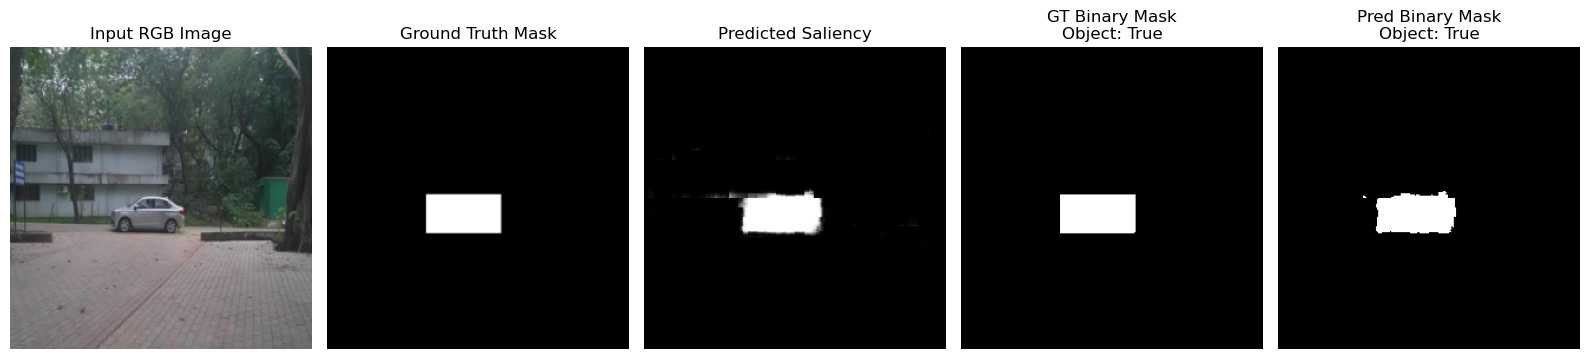

Predicted: Object Present
Ground Truth: Object Present


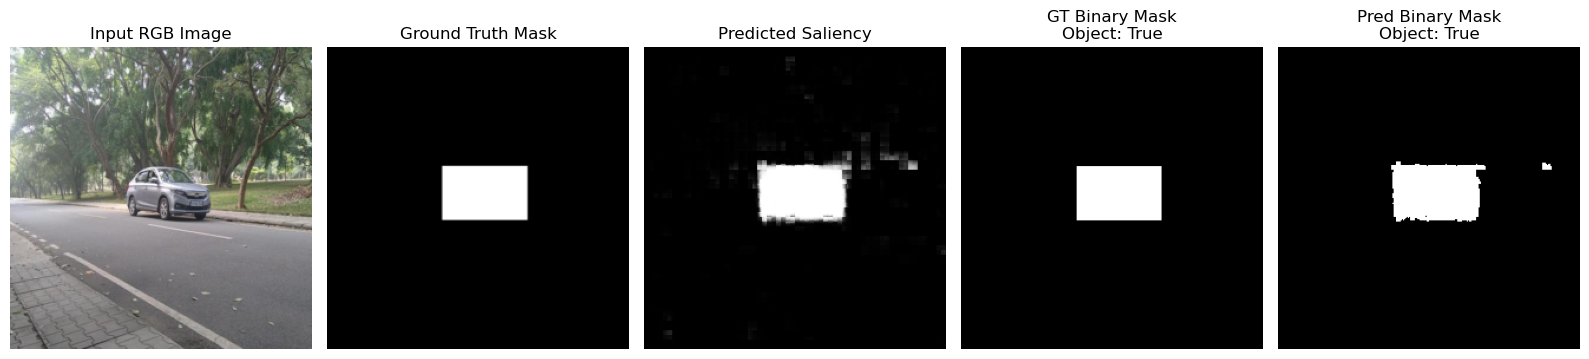

Predicted: Object Present
Ground Truth: Object Present


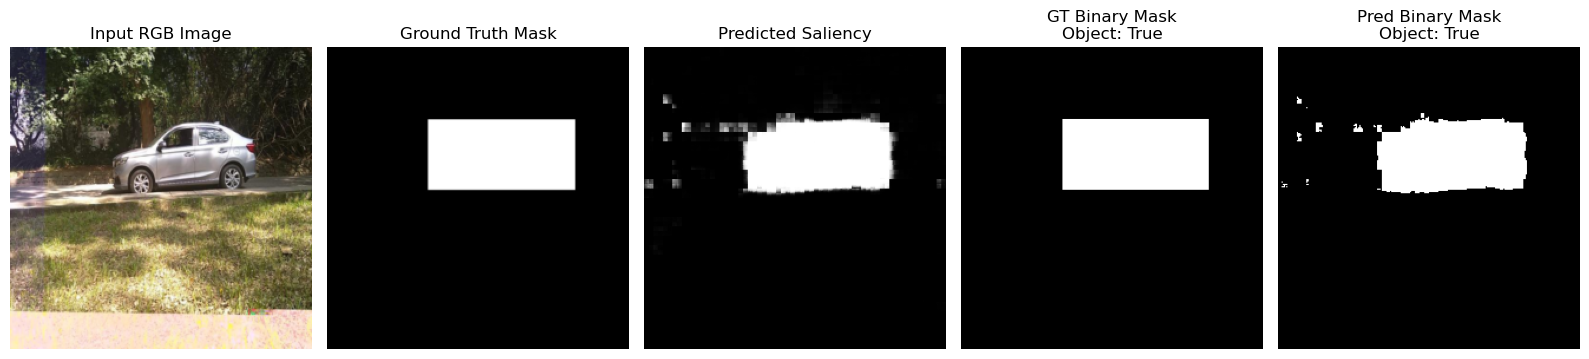

Predicted: Object Present
Ground Truth: Object Present


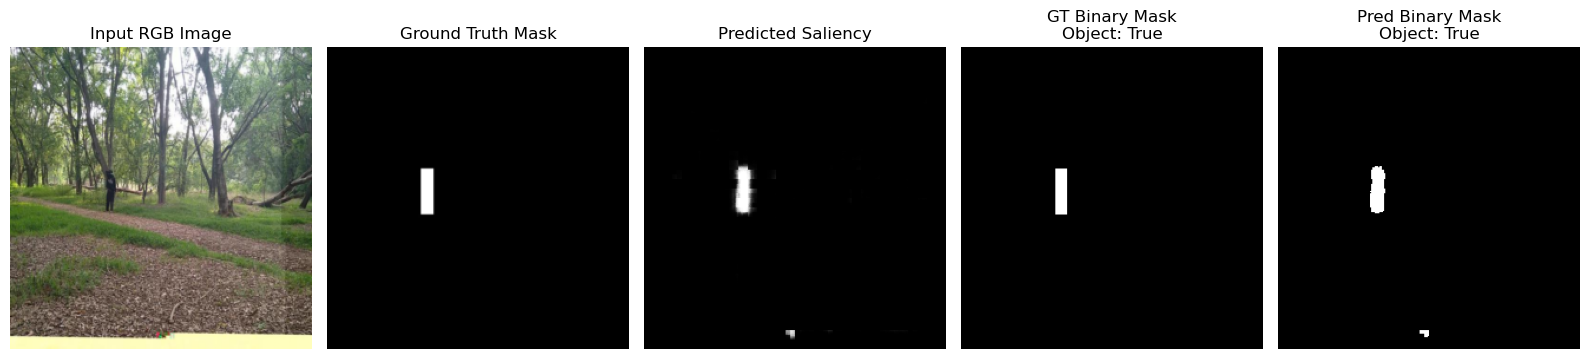

Predicted: Object Present
Ground Truth: Object Present


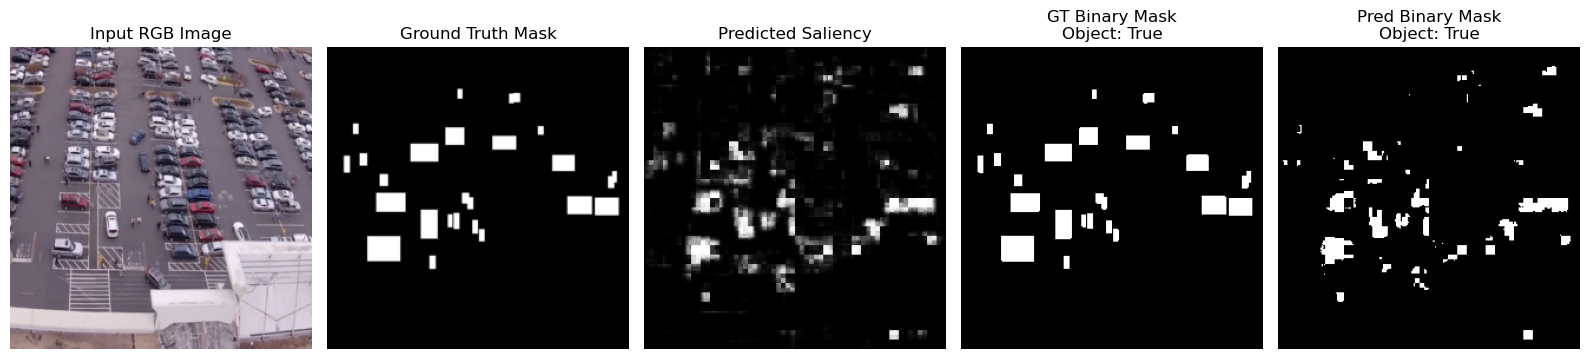

Predicted: Object Present
Ground Truth: Object Present


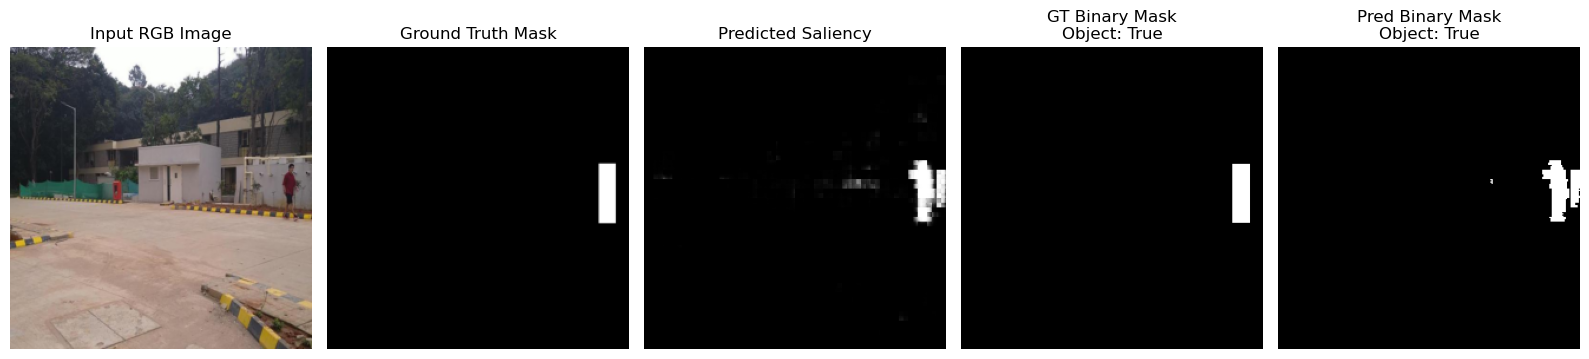

Predicted: Object Present
Ground Truth: Object Present


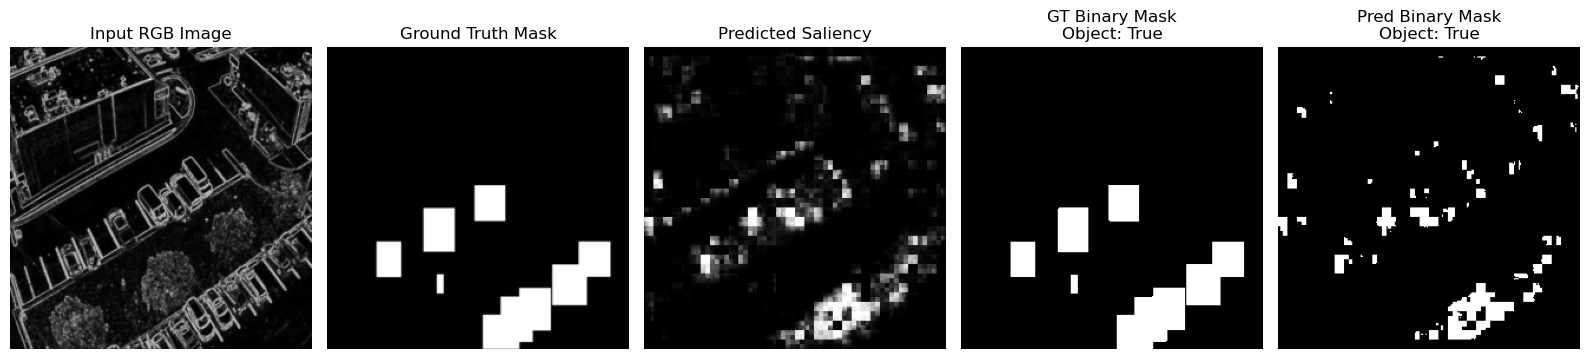

Predicted: Object Present
Ground Truth: Object Present


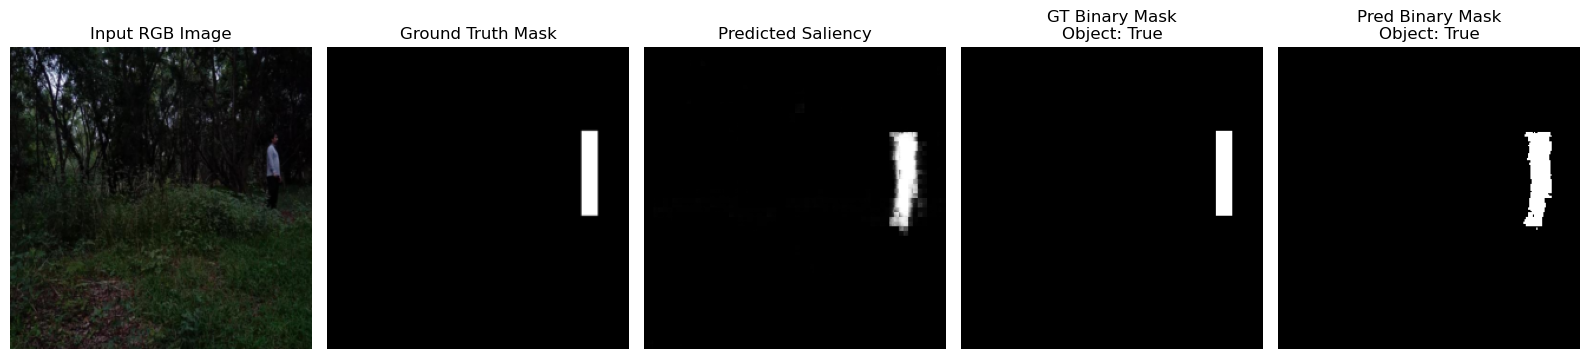

Predicted: Object Present
Ground Truth: Object Present


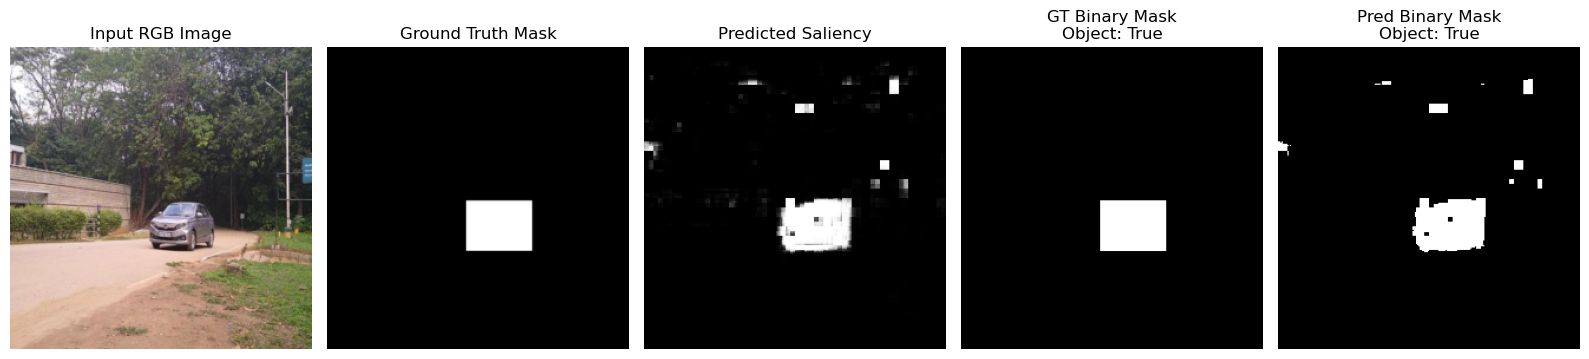

Predicted: Object Present
Ground Truth: Object Present


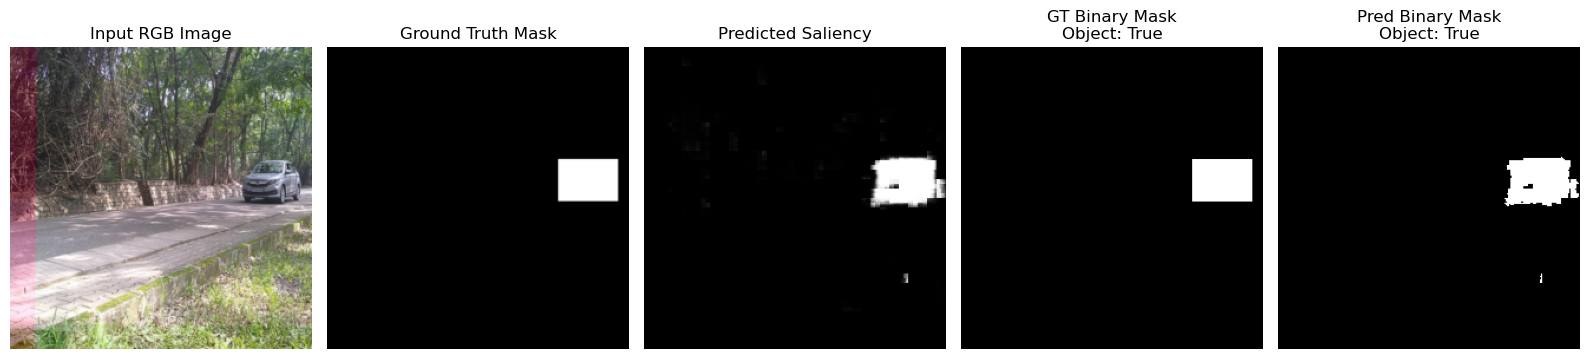

In [25]:
def visualize_detection_logic(model, dataloader, threshold=0.5, area_fraction=0.001, num_samples=10):
    model.eval()
    with torch.no_grad():
        indices = random.sample(range(len(dataloader.dataset)), num_samples)
        
        for idx in indices:
            image, mask = dataloader.dataset[idx]
            image = image.unsqueeze(0).to(device)
            mask = mask.unsqueeze(0).to(device)

            outputs = model(image)
            pred = outputs[0][0].cpu().numpy()
            gt = mask[0][0].cpu().numpy()
            rgb_np = image[0][:3].permute(1, 2, 0).cpu().numpy()

            pred_bin = pred > threshold
            gt_bin = gt > threshold

            pred_present = (np.sum(pred_bin) / pred_bin.size) > area_fraction
            gt_present = (np.sum(gt_bin) / gt_bin.size) > area_fraction

            print(f"Predicted: {'Object Present' if pred_present else 'No Object'}")
            print(f"Ground Truth: {'Object Present' if gt_present else 'No Object'}")

            fig, axs = plt.subplots(1, 5, figsize=(16, 4))
            axs[0].imshow(rgb_np)
            axs[0].set_title("Input RGB Image")
            axs[1].imshow(gt, cmap="gray")
            axs[1].set_title("Ground Truth Mask")
            axs[2].imshow(pred, cmap="gray")
            axs[2].set_title("Predicted Saliency")
            axs[3].imshow(gt_bin, cmap="gray")
            axs[3].set_title(f"GT Binary Mask\nObject: {gt_present}")
            axs[4].imshow(pred_bin, cmap="gray")
            axs[4].set_title(f"Pred Binary Mask\nObject: {pred_present}")

            for ax in axs:
                ax.axis('off')
            plt.tight_layout()
            plt.show()

visualize_detection_logic(model, test_loader, threshold=0.5, area_fraction=0.001, num_samples=10)


# ------------------ Export Model to .PT ------------------

In [7]:
# Instantiate model and load weights
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Saliency_Fused().to(device)
model.load_state_dict(torch.load("/home/user/Shivam/dsr_project/Project_files/models/saliency/saliency_model_early_fusion.pth"))
model.eval()

/tmp/ipykernel_341307/828845766.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/home/user/Shivam/dsr_project/Project_files/models/sali

Saliency_Fused(
  (encoder): Sequential(
    (0): Conv2d(4, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(256, 128, kernel_size=(2, 2), stride=(2, 2))
    (1): ReLU()
    (2): ConvTranspose2d(128, 64, kernel_size=(2, 2), stride=(2, 2))
    (3): ReLU()
    (4): ConvTranspose2d(64, 1, kernel_size=(2, 2), stride=(2, 2))
    (5): Sigmoid()
  )
)

In [8]:
model = model.to('cpu')

In [9]:
dummy_input = torch.randn(1, 4, 256, 256)
# Trace the model to TorchScript
scripted_model = torch.jit.trace(model, dummy_input)

In [10]:
# Save the TorchScript model
output_path = "/home/user/Shivam/dsr_project/Project_files/models/saliency/saliency_model_early_fusion.pt"
scripted_model.save(output_path)

print(f"TorchScript model saved to {output_path}")

TorchScript model saved to /home/user/Shivam/dsr_project/Project_files/models/saliency/saliency_model_early_fusion.pt
